## STOCK VARIANCE PREDICTION USING MACHINE LEARNING MODEL

#### LIBRARIES AND DATA IMPORTATION

Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


Read data into DataFrame

In [2]:
df_FPT = pd.read_csv("FPT.csv")
df_MSN = pd.read_csv("MSN.csv")
df_PNJ = pd.read_csv("PNJ.csv")
df_VIC = pd.read_csv("VIC.csv")

### DATA INSPECTS

#### Explore Data Structure

In [3]:
df_FPT.head(5)

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


In [4]:
df_MSN.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,MSN,12/25/2017 9:15,73.1,73.1,73.1,73.1,4210,0
1,MSN,12/25/2017 9:16,73.0,73.0,73.0,73.0,5000,0
2,MSN,12/25/2017 9:18,73.5,73.5,73.5,73.5,210,0
3,MSN,12/25/2017 9:20,73.2,73.5,73.1,73.1,2050,0
4,MSN,12/25/2017 9:21,73.0,73.0,73.0,73.0,1380,0


PNJ and VIC datasets have similar table structures..

In [5]:
df_FPT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ticker         97406 non-null  object 
 1   Date/Time      97406 non-null  object 
 2   Open           97406 non-null  float64
 3   High           97406 non-null  float64
 4   Low            97406 non-null  float64
 5   Close          97406 non-null  float64
 6   Volume         97406 non-null  int64  
 7   Open Interest  97406 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.9+ MB


In [6]:
df_MSN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135354 entries, 0 to 135353
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         135354 non-null  object 
 1   Date/Time      135354 non-null  object 
 2   Open           135354 non-null  float64
 3   High           135354 non-null  float64
 4   Low            135354 non-null  float64
 5   Close          135354 non-null  float64
 6   Volume         135354 non-null  int64  
 7   Open Interest  135354 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 8.3+ MB


In [7]:
df_PNJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125309 entries, 0 to 125308
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         125309 non-null  object 
 1   Date/Time      125309 non-null  object 
 2   Open           125309 non-null  float64
 3   High           125309 non-null  float64
 4   Low            125309 non-null  float64
 5   Close          125309 non-null  float64
 6   Volume         125309 non-null  int64  
 7   Open Interest  125309 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 7.6+ MB


In [8]:
df_VIC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101266 entries, 0 to 101265
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         101266 non-null  object 
 1   Date/Time      101266 non-null  object 
 2   Open           101266 non-null  float64
 3   High           101266 non-null  float64
 4   Low            101266 non-null  float64
 5   Close          101266 non-null  float64
 6   Volume         101266 non-null  int64  
 7   Open Interest  101266 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 6.2+ MB


The four datasets have no N/A value, and all are in a proper datatype to manipulate.

Creating a function to inspect each dataset properties, then shift each of them by one to make it feasible to predict future values from the past ones:

In [9]:
def dfInspect(df):
    dfRet = df[["Date/Time", "High", "Low", "Volume", "Close"]].copy()
    dfRet = dfRet.shift(1)
    dfRet = dfRet.rename(columns={"High":"prevHigh","Low":"prewLow", "Volume":"prevVolume", "Close": "prevClose"})
    dfRet = dfRet.join(df[["Close"]]).iloc[1:]

    corrmat = dfRet.corr(numeric_only=True)
    plt.figure(figsize=(15,7))
    sns.heatmap(corrmat, annot=True, center=0)
    print(corrmat)
    return dfRet
    

            prevHigh   prewLow  prevVolume  prevClose     Close
prevHigh    1.000000  0.999968    0.078938   0.999982  0.999944
prewLow     0.999968  1.000000    0.076824   0.999980  0.999940
prevVolume  0.078938  0.076824    1.000000   0.077942  0.078254
prevClose   0.999982  0.999980    0.077942   1.000000  0.999950
Close       0.999944  0.999940    0.078254   0.999950  1.000000


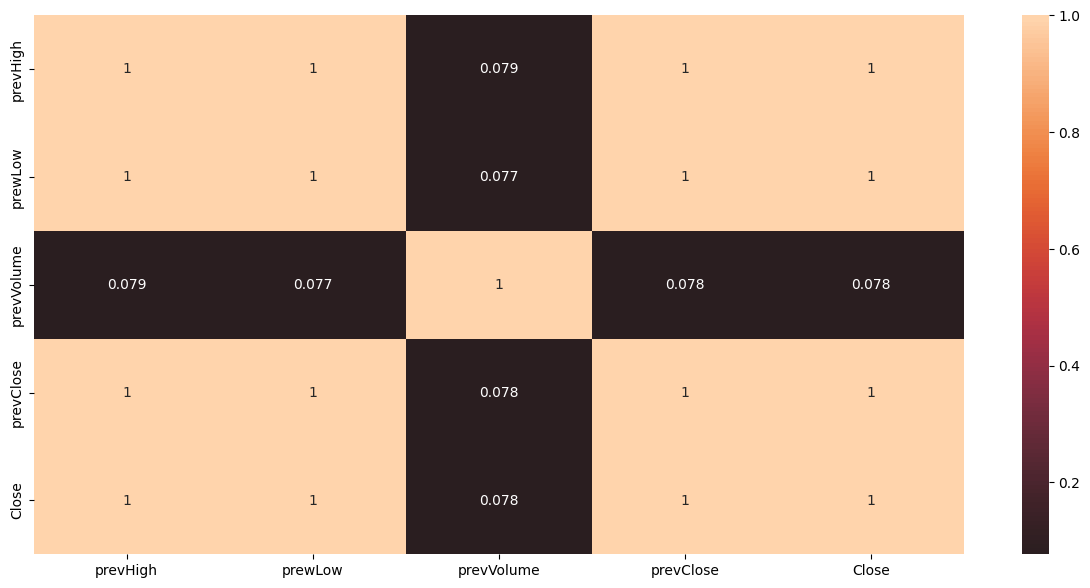

In [10]:
df_FPTnew = dfInspect(df_FPT)

In [11]:
df_FPTnew.head()

,Date/Time,prevHigh,prewLow,prevVolume,prevClose,Close
1,12/25/2018 9:15,30.89,30.89,35410.0,30.89,30.81
2,12/25/2018 9:16,30.81,30.81,190.0,30.81,30.74
3,12/25/2018 9:17,30.81,30.74,1120.0,30.74,30.74
4,12/25/2018 9:18,30.74,30.74,2120.0,30.74,30.74
5,12/25/2018 9:19,30.74,30.74,22500.0,30.74,30.74


Similarly, we run dfInspect function with the others.

            prevHigh   prewLow  prevVolume  prevClose     Close
prevHigh    1.000000  0.999910   -0.038576   0.999948  0.999881
prewLow     0.999910  1.000000   -0.039693   0.999960  0.999897
prevVolume -0.038576 -0.039693    1.000000  -0.039188 -0.039497
prevClose   0.999948  0.999960   -0.039188   1.000000  0.999902
Close       0.999881  0.999897   -0.039497   0.999902  1.000000


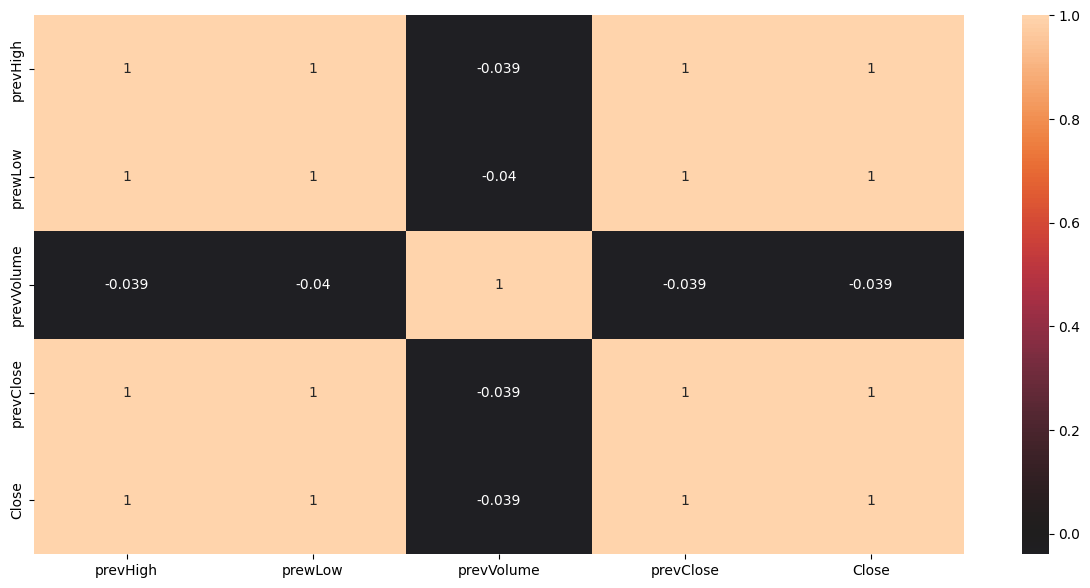

In [12]:
df_MSNnew = dfInspect(df_MSN)

            prevHigh   prewLow  prevVolume  prevClose     Close
prevHigh    1.000000  0.998090   -0.046370   0.998738  0.997145
prewLow     0.998090  1.000000   -0.053303   0.999091  0.997991
prevVolume -0.046370 -0.053303    1.000000  -0.050664 -0.050391
prevClose   0.998738  0.999091   -0.050664   1.000000  0.997564
Close       0.997145  0.997991   -0.050391   0.997564  1.000000


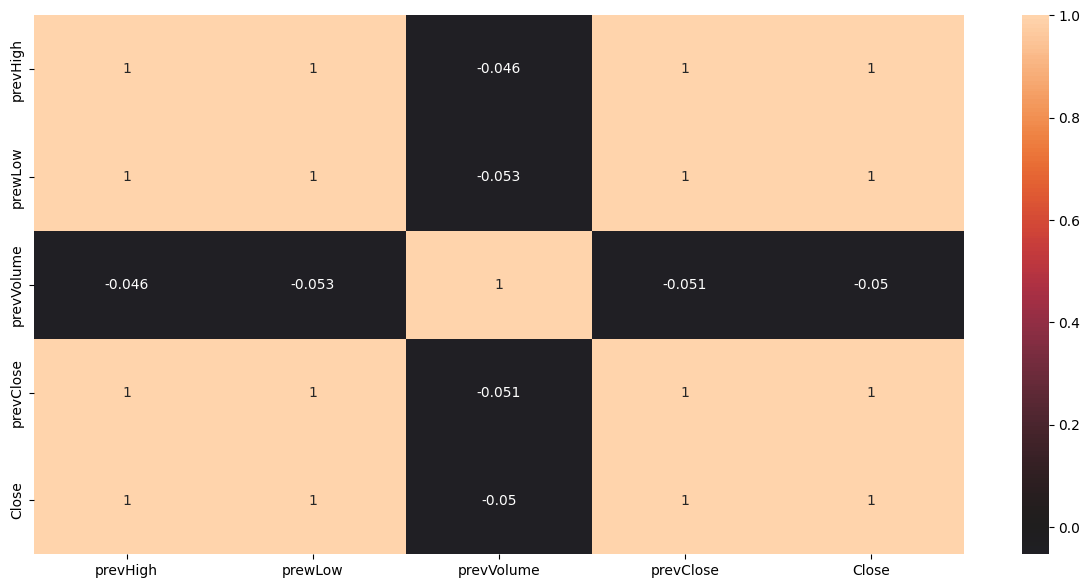

In [13]:
df_PNJnew = dfInspect(df_PNJ)

            prevHigh   prewLow  prevVolume  prevClose     Close
prevHigh    1.000000  0.999901   -0.015678   0.999952  0.999843
prewLow     0.999901  1.000000   -0.016562   0.999941  0.999829
prevVolume -0.015678 -0.016562    1.000000  -0.016063 -0.016381
prevClose   0.999952  0.999941   -0.016063   1.000000  0.999851
Close       0.999843  0.999829   -0.016381   0.999851  1.000000


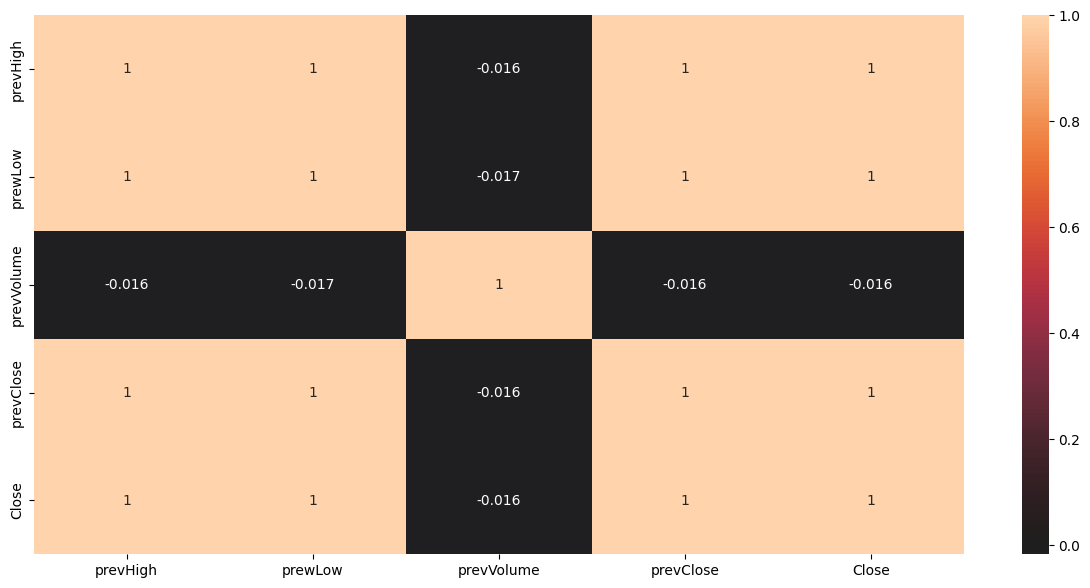

In [14]:
df_VICnew = dfInspect(df_VIC)

According to those heatmaps: The actual close value depends strongly on the previous Open, High, and Close value for all datasets, so we will emit previous Volume attributes from the listed independent variables.

==================

### MACHINE LEARNING MODEL TRAINING

Value of Dependent and Independent variables are in a good range already, so we do not need to scale them.

#### Splitting dataset function

In [15]:
def dfSplit(df):
    x_data = df[["prevHigh", "prewLow", "prevClose"]]
    y_data = df["Close"]
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=2)
    print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
    return x_train, x_test, y_train, y_test

#### Linear Regression Model for FPT and PNJ Ticker

Train model with train-split

In [16]:
FPTmodel = LinearRegression()
x_train, x_test, y_train, y_test = dfSplit(df_FPTnew)
FPTmodel.fit(x_train, y_train)

(77924, 3) (19481, 3) (77924,) (19481,)


LinearRegression()

Use the model to predict test-split

In [18]:
y_predict = FPTmodel.predict(x_test)
df_y = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
print(df_y)

       Actual  Predicted
90303   53.00  52.977631
76305   46.65  46.663494
57139   37.56  37.599925
81771   49.35  49.238474
75914   45.10  45.099348
...       ...        ...
83268   51.40  51.398863
66551   48.25  48.213375
57193   36.88  36.951531
33595   47.97  47.889133
22501   40.96  40.959666

[19481 rows x 2 columns]


In [20]:
mse_lr = mean_squared_error(y_test, y_predict)
print('The mean square error of price and predicted value is: ', mse_lr)

The mean square error of price and predicted value is: 

 0.0037723162669843413


In [21]:
#R-Squared
r_squared_lr = FPTmodel.score(x_train,y_train)
print('***The R-Squared value of fitted model is:', r_squared_lr)

***The R-Squared value of fitted model is: 0.9999056591534311


Build a similar model for PNJ Ticker

In [22]:
PNJmodel = LinearRegression()
x_train, x_test, y_train, y_test = dfSplit(df_PNJnew)
PNJmodel.fit(x_train, y_train)
y_predict = PNJmodel.predict(x_test)
df_y = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
mse_lr = mean_squared_error(y_test, y_predict)
print('The mean square error of price and predicted value is: ', mse_lr)
r_squared_lr = PNJmodel.score(x_train,y_train)
print('***The R-Squared value of fitted model is:', r_squared_lr)

(100246, 3) (25062, 3) (100246,) (25062,)
The mean square error of price and predicted value is:  0.3673937468563644
***The R-Squared value of fitted model is: 0.9962907122649558


#### Polynomial Regression Model for MSN and VIC Ticker

Visuallize two datasets to see the overall trends:

<Axes: >

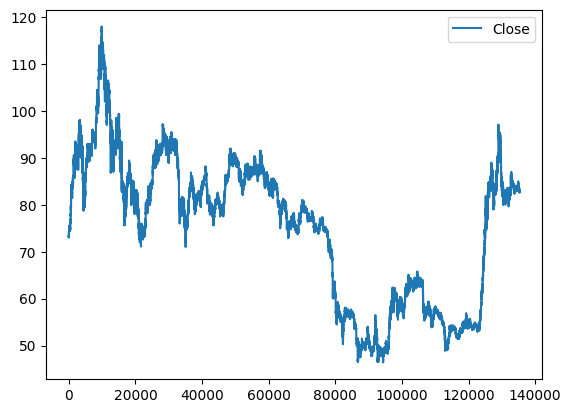

In [23]:
df_MSN.plot.line(y='Close', use_index = True)

<Axes: >

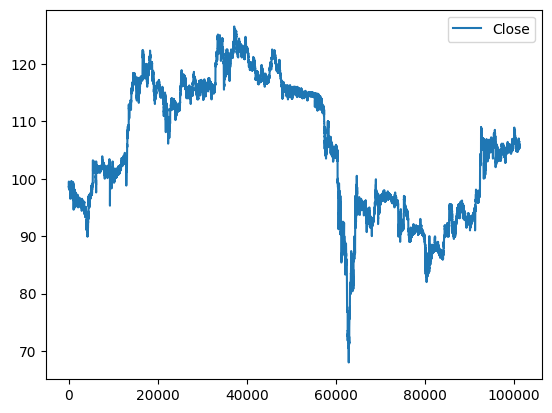

In [24]:
df_VIC.plot.line(y='Close', use_index = True)

In [25]:
Polymodel = PolynomialFeatures(degree=5)
x_train, x_test, y_train, y_test = dfSplit(df_MSNnew)
# Transforming data to feed polynomial model
x_train_poly = Polymodel.fit_transform(x_train)
x_test_poly = Polymodel.fit_transform(x_test)

(108282, 3) (27071, 3) (108282,) (27071,)


Train model with transformed train-split

In [26]:
MSNmodel = LinearRegression().fit(x_train_poly, y_train)

In [27]:
y_predict = MSNmodel.predict(x_test_poly)

In [28]:
mse_pr = mean_squared_error(y_test, y_predict)
print('The mean square error of price and predicted value is: ', mse_pr)

The mean square error of price and predicted value is:  838.329443447596


In [29]:
r_squared_pr = MSNmodel.score(x_train_poly,y_train)
print('the R-Squared value of fitted model is:',r_squared_pr)

the R-Squared value of fitted model is: 0.9998325465175644


Build a similar model for VIC Ticker

In [30]:
x_train, x_test, y_train, y_test = dfSplit(df_VICnew)
# Transforming data to feed polynomial model
x_train_poly = Polymodel.fit_transform(x_train)
x_test_poly = Polymodel.fit_transform(x_test)
VICmodel = LinearRegression().fit(x_train_poly, y_train)
y_predict = VICmodel.predict(x_test_poly)
mse_pr = mean_squared_error(y_test, y_predict)
print('The mean square error of price and predicted value is: ', mse_pr)
r_squared_pr = VICmodel.score(x_train_poly,y_train)
print('the R-Squared value of fitted model is:',r_squared_pr)

(81012, 3) (20253, 3) (81012,) (20253,)
The mean square error of price and predicted value is:  504.58925134322504
the R-Squared value of fitted model is: 0.9997257134285197


### USING TRAINED MODELS TO PREDICT FUTURE VALUES' VARIANCE

#### Function to proceed inputs for models

In [31]:
def helper(df, model, startT, endT, poly=False):
    # This function is to help to extract related inputs that are needed for prediction
    df["Date/Time"] = pd.to_datetime(df["Date/Time"])
    filtered = df[(df["Date/Time"] >= startT) & (df["Date/Time"] <= endT)]
    if filtered.empty:
        return None, None
    current = filtered["Close"].iloc[-1]
    filtered = filtered[["High", "Low", "Close"]]
    filtered = filtered.rename(columns={"High":"prevHigh","Low":"prewLow", "Close": "prevClose"})
    filtered = filtered.mean()
    if poly:
        filtered = Polymodel.fit_transform([filtered])
    else:
        filtered = [filtered]
    y_predict = model.predict(filtered)
    return current, (y_predict[0] - current)

In [32]:
def StockModel(Sname, n, ntype, dtime):
    # Sname: stock name
    # n: numbers of minutes/hours/days to predict
    # ntype: "m"/"h"/"d"
    # dtime: latest datetime recorded
    # return: print and return the variance 

    # Prepare input for helper function
    switcher = {
        "FPT": {"model": FPTmodel, "df": df_FPT},
        "MSN": {"model": MSNmodel, "df": df_MSN},
        "PNJ": {"model": PNJmodel, "df": df_PNJ},
        "VIC": {"model": VICmodel, "df": df_VIC}
    }
    df = switcher[Sname]["df"]
    model = switcher[Sname]["model"]

    if n < 1:
        print("Invalid n")
        return
    dtime = pd.to_datetime(dtime)
    match ntype:
        case "m":
            # Prediction available in range of 30 minutes
            startT = dtime - timedelta(minutes=30*n)
        case "h":
            # Prediction available in range of 2 hour
            startT = dtime - timedelta(hours=2*n)
        case "d":
            # Prediction available in range of 3 day
            startT = dtime - timedelta(days=1)
        case _:
            print("Invalid type")
            return
    if Sname == "MSN" or Sname == "VIC":
        current, variance = helper(df, model, startT, dtime, True)
    else:
        current, variance = helper(df, model, startT, dtime)
    print(f"Current price: {current}")
    print(f"Variance in next {n}{ntype}: {variance}")
    return variance
    
    

#### Test with a few cases:

In [33]:
# FPT Ticker
StockModel("FPT", 1, "m", "12/25/2018 9:20")

Current price: 30.74
Variance in next 1m: 0.0390387160376946


c:\Users\minht\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.0390387160376946

In [34]:
# VIC Ticker
StockModel("VIC", 2, "h", "11/1/2019 10:32")

Current price: 121.0
Variance in next 2h: -0.938455582022911


-0.938455582022911

In [35]:
# MSN Ticker
StockModel("MSN", 1, "d", "12/25/2017 10:05")

Current price: 73.0
Variance in next 1d: 0.17010033014133796


0.17010033014133796

In [36]:
# PNJ Ticker
StockModel("PNJ", 2, "m", "12/25/2019 9:20")

Current price: 84.5
Variance in next 2m: -1.1462951064002027


c:\Users\minht\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-1.1462951064002027